# Model Training

In [2]:
%load_ext autoreload
%autoreload 2

import common
import pandas as pd
import scipy.sparse
import joblib
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import wandb
import pickle
import os

In [3]:
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: nontaphat-c (nontaphat-c-nus) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [4]:
def evaluate(y_true,y_pred,digits=5):
    print(classification_report(y_true,y_pred,digits=digits))
    confusion_mtx = confusion_matrix(y_true,y_pred)
    disp = ConfusionMatrixDisplay(confusion_mtx)
    disp.plot()
    plt.show()

## Parameters

In [5]:
# change this accordingly
project_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

save_path = f"{project_path}/scicite_preprocessed"
dataset = "selected-features"
project_name = "model-comparison-smote-log-reg-fine-tuned"

## 1. Load dataset

In [6]:
train_df = pd.read_csv(f"{save_path}/train-{dataset}.csv")
test_df = pd.read_csv(f"{save_path}/test-{dataset}.csv")
label_encoder = joblib.load(f"{save_path}/label_encoder.pkl")

X_train = train_df.drop(columns=['label'])
y_train = train_df["label"]
X_test = test_df.drop(columns=['label'])
y_test = test_df["label"]

smote = SMOTE(sampling_strategy='all', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

## 2. Train-validation split

In [7]:
# Split into 80% train and 20% validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Train logistic regression classifier

e:\cs4248_proj\nlp_proj\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classifier based line
-----Evaluation-----
Accuracy: 0.7643
Macro F1-score: 0.7398
Micro F1-score: 0.7643


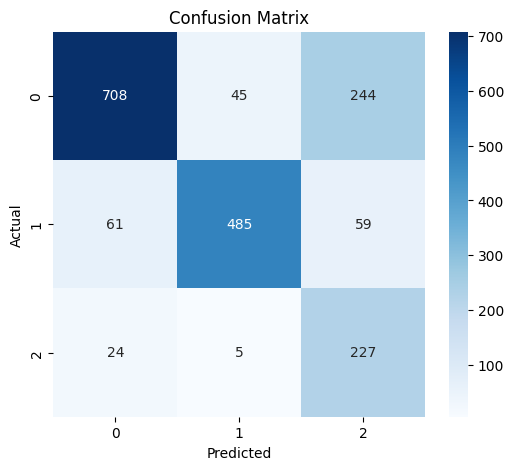

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Accuracy Score,▁
Macro F1-score,▁
Micro F1-score,▁
Accuracy Score,0.76426
Macro F1-score,0.73985
Micro F1-score,0.76426


In [23]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

wandb.init(entity='cs4248-nlp-project',project=f"{project_name}-{dataset}", name="log-reg-base-line")
common.evaluate(y_test, y_pred, label_encoder, "Logistic Regression Classifier based line")
wandb.finish()

## Fine tuned logistic regression Classifier

In [24]:
params = {"C":[0.01, 0.1, 1, 10, 100],"max_iter":[10000000],'class_weight':['balanced',None]}

e:\cs4248_proj\nlp_proj\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
e:\cs4248_proj\nlp_proj\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

              precision    recall  f1-score   support

           0    0.84120   0.73320   0.78349       997
           1    0.79051   0.79835   0.79441       605
           2    0.53968   0.79688   0.64353       256

    accuracy                        0.76319      1858
   macro avg    0.72380   0.77614   0.74048      1858
weighted avg    0.78315   0.76319   0.76776      1858



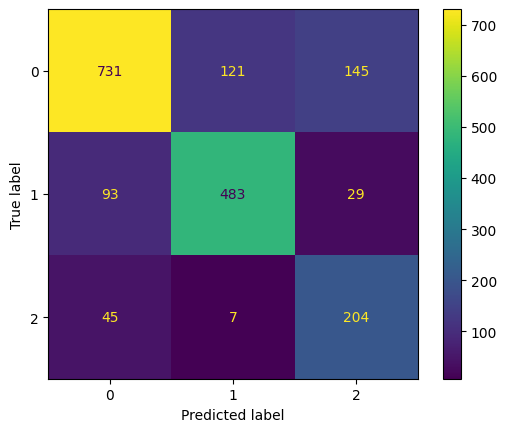

Logistic Regrssion Classifier fine tuned
-----Evaluation-----
Accuracy: 0.7632
Macro F1-score: 0.7405
Micro F1-score: 0.7632


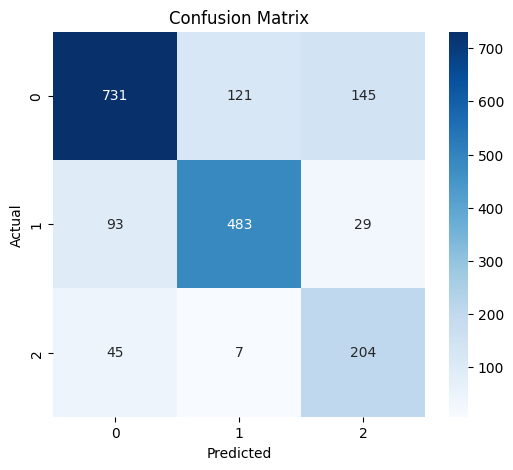

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Accuracy Score,▁
Macro F1-score,▁
Micro F1-score,▁
Accuracy Score,0.76319
Macro F1-score,0.74048
Micro F1-score,0.76319


TypeError: dump() missing required argument 'file' (pos 2)

In [ ]:
model = LogisticRegression()
model = GridSearchCV(model,params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate(y_test,y_pred)
wandb.init(entity='cs4248-nlp-project',project=f"{project_name}-{dataset}", name="log-reg-fine-tuned")
common.evaluate(y_test, y_pred, label_encoder, "Logistic Regrssion Classifier fine tuned")
wandb.finish()
with open(r"E:\cs4248_proj\CS4248-NLP-Project\model\fine-tuned-log-reg.pkl", "wb") as f:
    pickle.dump(model,f)

In [26]:
model.best_params_

{'C': 100, 'class_weight': 'balanced', 'max_iter': 10000000}

e:\cs4248_proj\nlp_proj\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classifier fine tuned saving
-----Evaluation-----
Accuracy: 0.7632
Macro F1-score: 0.7405
Micro F1-score: 0.7632


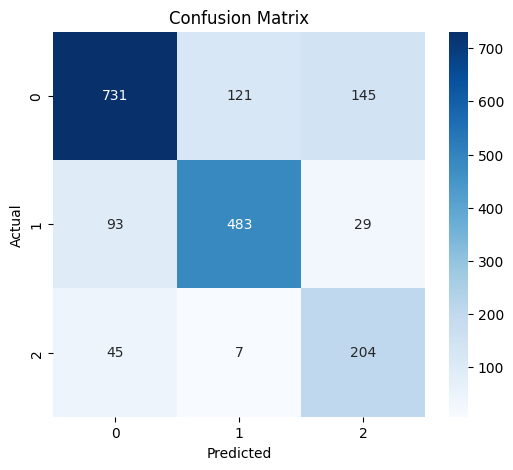

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Accuracy Score,▁
Macro F1-score,▁
Micro F1-score,▁
Accuracy Score,0.76319
Macro F1-score,0.74048
Micro F1-score,0.76319


In [12]:
# fine tuned parameters
model = LogisticRegression(C=100,class_weight='balanced',max_iter=10000000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

wandb.init(entity='cs4248-nlp-project',project=f"{project_name}-{dataset}", name="log-reg-fine-tuned-saving")
common.evaluate(y_test, y_pred, label_encoder, "Logistic Regression Classifier fine tuned saving")
wandb.finish()

In [13]:
with open(r"E:\cs4248_proj\CS4248-NLP-Project\model\fine-tuned-log-reg.pkl", "wb") as f:
    pickle.dump(model,f)

In [14]:
model.cv_results_

AttributeError: 'LogisticRegression' object has no attribute 'cv_results_'